# Uploading Dataset

In [333]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import PIL.Image as img

# Uploading dataset
def img_array(path):
    image = img.open(path)
    tmp = np.array(image)
    image.close()
    return tmp

globs = glob.glob('dataset/1/*.png')
dataset = np.array(list(map(img_array, globs)))
labels = np.ones(len(dataset))-1

for i in range(2,9):
    globs = glob.glob('dataset/'+str(i)+'/*.png')
    dataset = np.concatenate([dataset,np.array(list(map(img_array, globs)))])
    labels = np.concatenate([labels, np.ones(len(np.array(list(map(img_array, globs)))))*(i-1)])
    
# Making them all in one chanel
dataset = np.mean(dataset, axis=3)

In [334]:
# Checking shapes
print(dataset.shape)
print(labels.shape)

(240, 28, 28)
(240,)


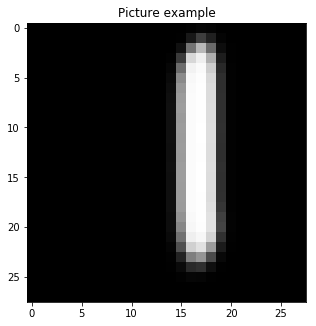

In [335]:
rcParams['figure.figsize'] = 5, 10
plt.title('Picture example')
plt.imshow(dataset[1], cmap='Greys')
plt.show()

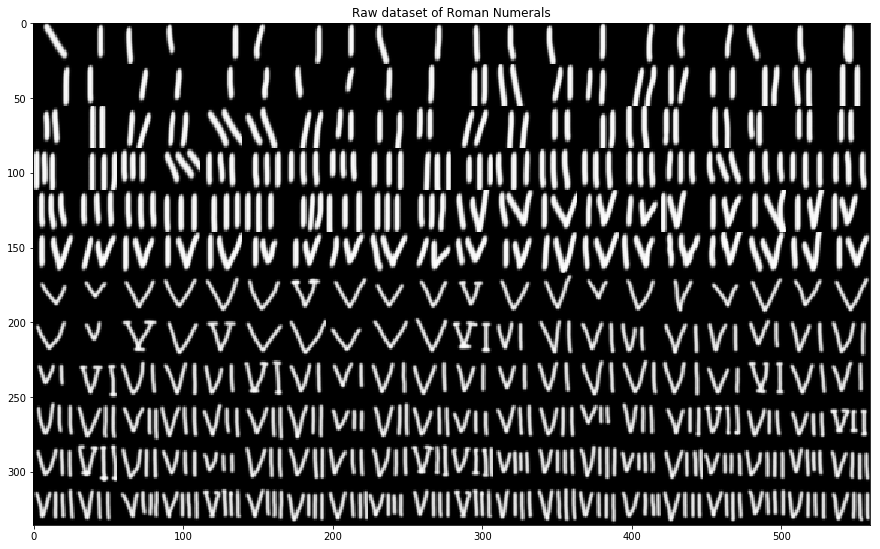

In [336]:
def gallery(array, ncols=20):
    nindex, height, width = array.shape
    nrows = nindex//ncols
    assert nindex == nrows*ncols
    # want result.shape = (height*nrows, width*ncols, intensity)
    result = (array.reshape(nrows, ncols, height, width)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols))
    return result

rcParams['figure.figsize'] = 15, 30
result = gallery(dataset)
plt.title('Raw dataset of Roman Numerals')
plt.imshow(result, cmap='Greys')
plt.show()

# Augmentation

In [309]:
import Augmentor
from Augmentor import Pipeline

def augmentation(path):
    p = Augmentor.Pipeline(path) # ensure you press enter after this, don't just c&p this code.
    Pipeline.set_seed(100)
    p.rotate(probability=0.3, max_left_rotation=3, max_right_rotation=3)
    p.random_distortion(probability=0.7, grid_width=4, grid_height=4, magnitude=2)
    p.random_erasing(probability=0.2, rectangle_area=0.2)
    p.sample(200)

path = 'dataset/'
for i in range(1,9):
    augmentation(path+str(i)+'/')


Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x1C3A1297B8>:   2%|▎         | 5/200 [00:00<00:08, 22.84 Samples/s]                

Initialised with 30 image(s) found.
Output directory set to dataset/1/output.

Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x11BE020F0>: 100%|██████████| 200/200 [00:00<00:00, 243.18 Samples/s]                 
Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x1C3A0B5080>:   2%|▏         | 3/200 [00:00<00:12, 15.83 Samples/s]

Initialised with 30 image(s) found.
Output directory set to dataset/2/output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=28x28 at 0x1C3C448588>: 100%|██████████| 200/200 [00:00<00:00, 79.31 Samples/s]
Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x1C3A129358>:   2%|▏         | 3/200 [00:00<00:09, 21.64 Samples/s]

Initialised with 30 image(s) found.
Output directory set to dataset/3/output.

Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x1C397D0A58>: 100%|██████████| 200/200 [00:00<00:00, 306.98 Samples/s]               
Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x1C3C465DD8>:   2%|▏         | 4/200 [00:00<00:08, 24.21 Samples/s]

Initialised with 30 image(s) found.
Output directory set to dataset/4/output.

Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x11BE027F0>: 100%|██████████| 200/200 [00:00<00:00, 250.14 Samples/s]                 
Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x11BE021D0>:   2%|▏         | 4/200 [00:00<00:08, 23.80 Samples/s]

Initialised with 30 image(s) found.
Output directory set to dataset/5/output.

Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x1C3A1299E8>: 100%|██████████| 200/200 [00:00<00:00, 282.58 Samples/s]               
Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x11BDECEB8>:   2%|▏         | 3/200 [00:00<00:10, 19.54 Samples/s] 

Initialised with 30 image(s) found.
Output directory set to dataset/6/output.

Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x1C397F0B38>: 100%|██████████| 200/200 [00:00<00:00, 311.50 Samples/s]               
Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x1C3A091390>:   3%|▎         | 6/200 [00:00<00:07, 26.10 Samples/s]                

Initialised with 30 image(s) found.
Output directory set to dataset/7/output.

Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x1C3C465A20>: 100%|██████████| 200/200 [00:00<00:00, 251.83 Samples/s]               
Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x11BDFE0B8>:   2%|▏         | 3/200 [00:00<00:08, 22.25 Samples/s] 

Initialised with 30 image(s) found.
Output directory set to dataset/8/output.

Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x1C3A0C6DA0>: 100%|██████████| 200/200 [00:00<00:00, 267.94 Samples/s]               


In [337]:
globs = glob.glob('dataset/1/output/*.png')
aug_dataset = np.array(list(map(img_array, globs)))
aug_labels = np.ones(len(aug_dataset))-1

for i in range(2,9):
    globs = glob.glob('dataset/'+str(i)+'/output/*.png')
    aug_dataset = np.concatenate([aug_dataset,np.array(list(map(img_array, globs)))])
    aug_labels = np.concatenate([aug_labels, np.ones(len(np.array(list(map(img_array, globs)))))*(i-1)])
    
# Making them all in one chanel
aug_dataset = np.mean(aug_dataset, axis=3)

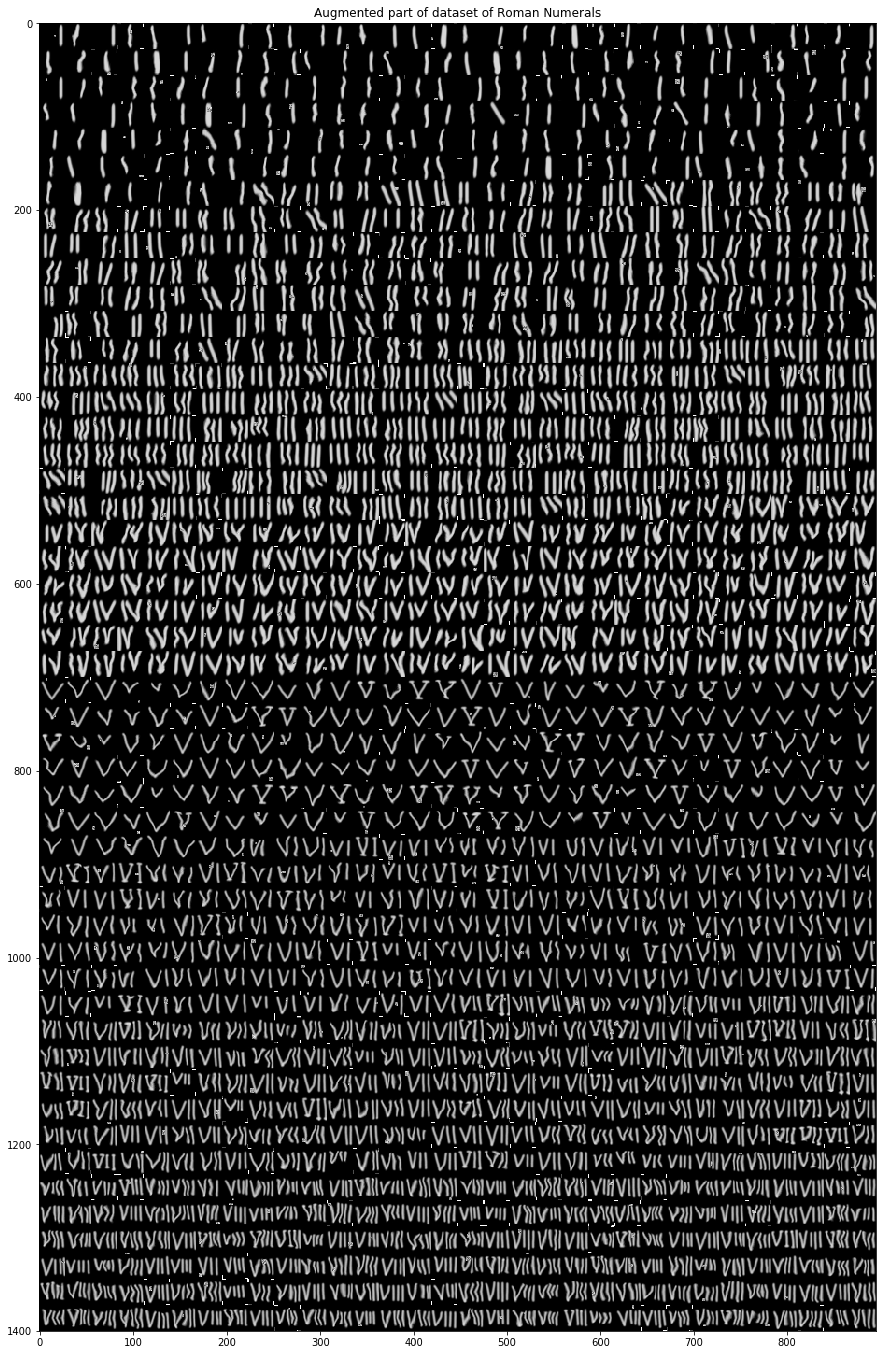

In [348]:
result = gallery(aug_dataset, 32)
plt.title('Augmented part of dataset of Roman Numerals')
plt.imshow(result, cmap='Greys')
plt.show()

# Concating, spliting to train and test and normalizing

In [340]:
from sklearn.model_selection import train_test_split
X = np.concatenate([dataset, aug_dataset])
# X = dataset
# y = labels
X = X/255.
X = X.reshape((len(X), 28*28))
y = np.concatenate([labels, aug_labels])
X,y = shuffle(X, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling

In [341]:
# Training Parameters
learning_rate = 0.001
num_steps = 1000
batch_size = 128

# Network Parameters
num_input = 784 # data input (img shape: 28*28)
num_classes = 8 # total classes (1-8 digits)
dropout = 0.25 # Dropout, probability to drop a unit

In [342]:
# Create the neural network
def conv_net(x_dict, n_classes, dropout, reuse, is_training):
    
    # Define a scope for reusing the variables
    with tf.variable_scope('ConvNet', reuse=reuse):
        # TF Estimator input is a dict, in case of multiple inputs
        x = x_dict['images']

        # Data input is a 1-D vector of 784 features (28*28 pixels)
        # Reshape to match picture format [Height x Width x Channel]
        # Tensor input become 4-D: [Batch Size, Height, Width, Channel]
        x = tf.reshape(x, shape=[-1, 28, 28, 1])

        # Convolution Layer with 32 filters and a kernel size of 5
        conv1 = tf.layers.conv2d(x, 32, 5, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        conv1 = tf.layers.max_pooling2d(conv1, 2, 2)

        # Convolution Layer with 64 filters and a kernel size of 3
        conv2 = tf.layers.conv2d(conv1, 64, 3, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        conv2 = tf.layers.max_pooling2d(conv2, 2, 2)

        # Flatten the data to a 1-D vector for the fully connected layer
        fc1 = tf.contrib.layers.flatten(conv2)

        # Fully connected layer (in tf contrib folder for now)
        fc1 = tf.layers.dense(fc1, 1024)
        # Apply Dropout (if is_training is False, dropout is not applied)
        fc1 = tf.layers.dropout(fc1, rate=dropout, training=is_training)

        # Output layer, class prediction
        out = tf.layers.dense(fc1, n_classes)

    return out

In [343]:
# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    
    # Build the neural network
    # Because Dropout have different behavior at training and prediction time, we
    # need to create 2 distinct computation graphs that still share the same weights.
    logits_train = conv_net(features, num_classes, dropout, reuse=False, is_training=True)
    logits_test = conv_net(features, num_classes, dropout, reuse=True, is_training=False)
    
    # Predictions
    pred_classes = tf.argmax(logits_test, axis=1)
    pred_probas = tf.nn.softmax(logits_test)
    
    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes) 
        
    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits_train, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=pred_classes,
      loss=loss_op,
      train_op=train_op,
      eval_metric_ops={'accuracy': acc_op})

    return estim_specs

In [344]:
from __future__ import division, print_function, absolute_import

# Import MNIST data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
# Build the Estimator
model = tf.estimator.Estimator(model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/sb/3r4rj6491bjb85tgb8ll61sm0000gn/T/tmp6cwmnue2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11bf0d4e0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [345]:
# Define the input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': X_train}, y=y_train,
    batch_size=batch_size, num_epochs=None, shuffle=True)
# Train the Model
model.train(input_fn, steps=num_steps)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/sb/3r4rj6491bjb85tgb8ll61sm0000gn/T/tmp6cwmnue2/model.ckpt.
INFO:tensorflow:loss = 2.0864857374456363, step = 1
INFO:tensorflow:global_step/sec: 6.7088
INFO:tensorflow:loss = 0.10881065647651098, step = 101 (14.907 sec)
INFO:tensorflow:global_step/sec: 7.10199
INFO:tensorflow:loss = 0.03406398554669814, step = 201 (14.080 sec)
INFO:tensorflow:global_step/sec: 7.09679
INFO:tensorflow:loss = 0.0026764494109780016, step = 301 (14.091 sec)
INFO:tensorflow:global_step/sec: 6.76123
INFO:tensorflow:loss = 0.0021909275425031926, step = 401 (14.791 sec)
INFO:tensorflow:global_step/sec: 7.1285
INFO:tensorflow:loss = 0.0019733760392617538, step = 501 (14.028 sec)
INFO:tensorflow:global_step/sec: 6.83442
IN

In [346]:
# Evaluate the Model
# Define the input function for evaluating
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': X_test}, y=y_test,
    batch_size=batch_size, shuffle=False)
# Use the Estimator 'evaluate' method
model.evaluate(input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-07-13:23:32
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/sb/3r4rj6491bjb85tgb8ll61sm0000gn/T/tmp6cwmnue2/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-02-07-13:23:32
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.98641306, global_step = 1000, loss = 0.046566244
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/sb/3r4rj6491bjb85tgb8ll61sm0000gn/T/tmp6cwmnue2/model.ckpt-1000


{'accuracy': 0.98641306, 'loss': 0.046566244, 'global_step': 1000}

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/sb/3r4rj6491bjb85tgb8ll61sm0000gn/T/tmp6cwmnue2/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


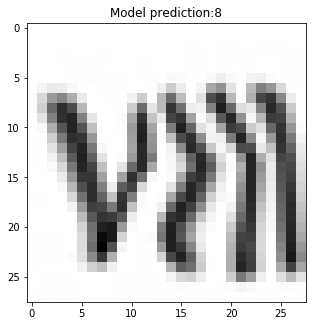

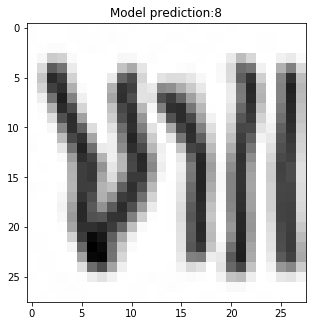

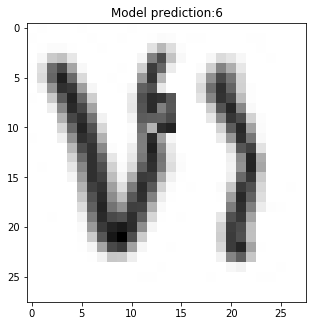

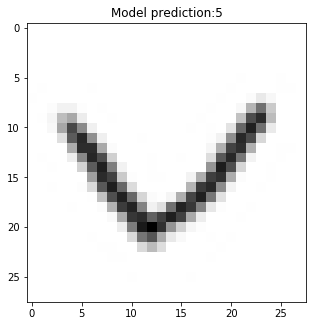

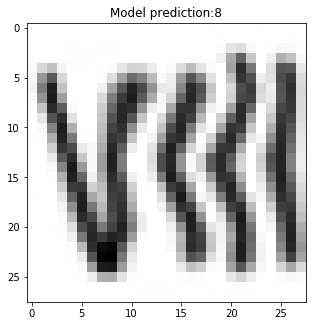

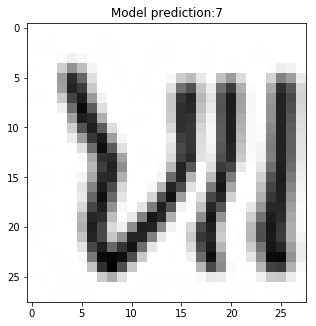

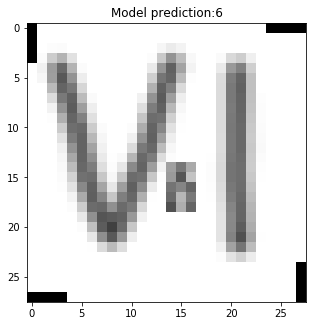

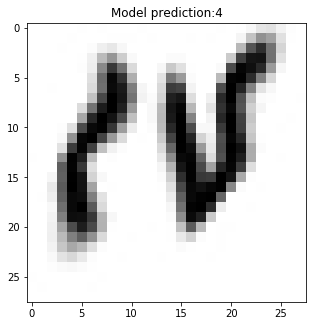

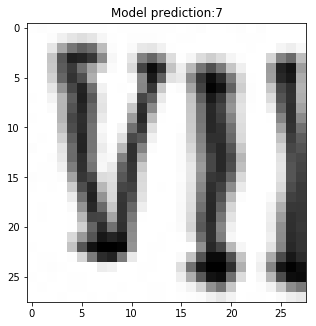

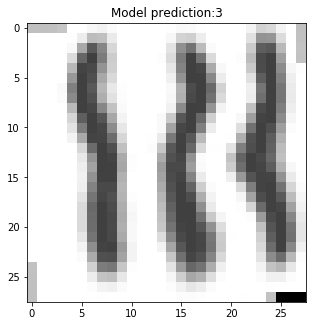

In [351]:
# Predict single images
n_images = 10
# Get images from test set
test_images = X_test[:n_images]
# Prepare the input data
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': test_images}, shuffle=False)
# Use the model to predict the images class
preds = list(model.predict(input_fn))

rcParams['figure.figsize'] = 5, 10

# Display
for i in range(n_images):
    plt.title("Model prediction:" + str(preds[i]+1))
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()